# **Tổng quan kinh tế vĩ mô thế giới**

## **1. Thư viện**

In [1409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

import plotly.express as px
import matplotlib.pyplot as pyplot
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.stats import gaussian_kde

## **2. Dữ liệu**

### **a. Tải dữ liệu**

In [1410]:
df1 = pd.read_csv("data/world_macro_economic_overview_2015.csv")
df1.head()

,Time,Time Code,Country Name,Country Code,GDP,"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)","Unemployment, total (% of total labor force) (national estimate)",Real interest rate (%),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),"Official exchange rate (LCU per US$, period average)","Foreign direct investment, net inflows (% of GDP)",GDP growth (annual %),GDP per capita (current US$),Consumer price index (2010 = 100)
0,2015,YR2015,Afghanistan,AFG,19134221744.5294,-0.66170916471352,2.44756300204629,..,12.2525481623247,..,..,61.1434615416667,0.884000458750617,1.45131466009762,566.881132665072,132.883209191418
1,2015,YR2015,Albania,ALB,11386853113.0189,1.89617402592365,0.563991350160876,17.193,7.27249242163997,27.2673911512668,44.5336151883802,125.961666666667,8.69053394301893,2.21872637517804,3952.80357364813,111.397164149808
2,2015,YR2015,Algeria,DZA,165979224866.131,4.78444700693889,-6.45565041377628,11.206,15.4532587780215,23.1717780134205,36.5233505852979,100.691433333333,-0.324012189691575,3.70000000138755,4197.41998491398,126.736646357875
3,2015,YR2015,American Samoa,ASM,673000000,..,1.4697327650683,..,..,63.5958395245171,98.8112927191679,..,..,3.14960629921259,13101.5418159165,..
4,2015,YR2015,Andorra,AND,2789882569.1005,..,0.660588959137868,..,..,..,..,..,..,1.43414039522716,38885.5485894753,..


### **b. Các cột**

In [1411]:
df1.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code', 'GDP',
       'Inflation, consumer prices (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Real interest rate (%)', 'Exports of goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Official exchange rate (LCU per US$, period average)',
       'Foreign direct investment, net inflows (% of GDP)',
       'GDP growth (annual %)', 'GDP per capita (current US$)',
       'Consumer price index (2010 = 100)'],
      dtype='object')

#### Giải Thích Các Chỉ Số Kinh Tế

#### 1. GDP
- **Tổng sản phẩm quốc nội (GDP)**: Tổng giá trị thị trường của tất cả các hàng hóa và dịch vụ cuối cùng được sản xuất trong một quốc gia trong một khoảng thời gian nhất định (thường là một năm).

#### 2. GDP growth (annual %)
- **Tăng trưởng GDP hàng năm (%)**: Tỷ lệ tăng hoặc giảm của GDP so với năm trước đó, thể hiện sự phát triển hoặc suy thoái kinh tế.

#### 3. Inflation, consumer prices (annual %)
- **Lạm phát, giá tiêu dùng hàng năm (%)**: Mức thay đổi trung bình của giá cả hàng hóa và dịch vụ tiêu dùng mà các hộ gia đình phải trả trong một năm.

#### 4. Inflation, GDP deflator (annual %)
- **Lạm phát, chỉ số điều chỉnh GDP (annual %)**: Tỷ lệ thay đổi giá trị của GDP danh nghĩa so với GDP thực tế, thể hiện sự thay đổi tổng mức giá của tất cả các hàng hóa và dịch vụ trong nền kinh tế.

#### 5. Exports of goods and services (% of GDP)
- **Xuất khẩu hàng hóa và dịch vụ (% của GDP)**: Tỷ lệ giá trị xuất khẩu so với GDP, phản ánh mức độ phụ thuộc của nền kinh tế vào thị trường quốc tế.

#### 6. Imports of goods and services (% of GDP)
- **Nhập khẩu hàng hóa và dịch vụ (% của GDP)**: Tỷ lệ giá trị nhập khẩu so với GDP, thể hiện mức độ phụ thuộc của nền kinh tế vào hàng hóa và dịch vụ từ nước ngoài.

#### 7. Official exchange rate (LCU per US$, period average)
- **Tỷ giá hối đoái chính thức (đơn vị tiền tệ nội địa trên mỗi USD, trung bình kỳ)**: Số đơn vị tiền tệ nội địa cần thiết để mua một đô la Mỹ, tính trung bình trong một khoảng thời gian nhất định.

#### 8. Foreign direct investment, net inflows (% of GDP)
- **Đầu tư trực tiếp nước ngoài (FDI), dòng vốn ròng (% của GDP)**: Tỷ lệ dòng vốn đầu tư trực tiếp từ nước ngoài so với GDP, thể hiện mức độ hấp dẫn đầu tư nước ngoài của một quốc gia.

#### 9. GDP per capita (current US$)
- **GDP bình quân đầu người (US$ hiện tại)**: Tổng GDP chia cho tổng dân số, tính bằng đô la Mỹ hiện tại, thể hiện mức thu nhập trung bình của mỗi người dân.

#### 10. Consumer price index (2010 = 100)
- **Chỉ số giá tiêu dùng (2010 = 100)**: Chỉ số đo lường mức thay đổi trung bình của giá cả một rổ hàng hóa và dịch vụ tiêu dùng theo thời gian, với năm gốc là 2010.


### **c. Thông tin dữ liệu**

In [1412]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 16 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Time                                                              219 non-null    object
 1   Time Code                                                         217 non-null    object
 2   Country Name                                                      217 non-null    object
 3   Country Code                                                      217 non-null    object
 4   GDP                                                               217 non-null    object
 5   Inflation, consumer prices (annual %)                             217 non-null    object
 6   Inflation, GDP deflator (annual %)                                217 non-null    object
 7   Unemployment, total (% of total labor force)

## **3. Tiền xử lý dữ liệu**

### **a. Kiểm tra trùng lặp dữ liệu**

In [1413]:
duplicates = df1.duplicated().sum()
print("Có", duplicates, "cột chứa dữ liệu trùng lấp.")

Có 2 cột chứa dữ liệu trùng lấp.


### **b. Loại bỏ những cột không cần thiết và trùng lặp, và xử lý dữ liệu sai**

In [1414]:
df1 = df1.drop(columns=["Time", "Time Code", "Country Code"])

df1 = df1.replace("..", np.nan)

cols_to_convert = df1.columns[1:]
for col in cols_to_convert:
    df1[col] = pd.to_numeric(df1[col], errors="coerce")

### **c. Kiểm tra tỷ lệ dữ liệu null trong tập dữ liệu**

In [1415]:
missing_values = df1.isnull().sum()
total_missing_values = (missing_values).sum()
total_cells = np.product(df1.shape)
percent_missing_values = (total_missing_values / total_cells) * 100
print("Percent of data that is missing", percent_missing_values)
print((missing_values / df1.shape[0]) * 100)

Percent of data that is missing

 15.973665973665973
Country Name                                                         2.252252
GDP                                                                  5.405405
Inflation, consumer prices (annual %)                               16.216216
Inflation, GDP deflator (annual %)                                   6.306306
Unemployment, total (% of total labor force) (national estimate)    45.045045
Real interest rate (%)                                              39.639640
Exports of goods and services (% of GDP)                            16.666667
Imports of goods and services (% of GDP)                            16.666667
Official exchange rate (LCU per US$, period average)                19.369369
Foreign direct investment, net inflows (% of GDP)                   12.612613
GDP growth (annual %)                                                5.855856
GDP per capita (current US$)                                         5.405405
Consumer price index (2010 = 100)           

#### **Kết luận:** Loại bỏ cột **Unemployment, total (% of total labor force) (national estimate)** và cột **Real interest rate (%)** vì missing value quá lớn 

### **d. Xử lý dữ liệu null trong tập dữ liệu**

#### - Loại bỏ những quốc gia có dữ liệu với gía trị null trên 50%

In [1416]:
row_threshold = len(df1.columns) * 0.5

df1 = df1.dropna(axis=0, thresh=row_threshold)

#### - Loại bỏ 2 cột có giá trị null chiếm cao

In [1417]:
df1.drop(
    columns=[
        "Unemployment, total (% of total labor force) (national estimate)",
        "Real interest rate (%)",
    ],
    inplace=True,
)

#### - Fill giá trị null bằng thuật toán KNN

In [1419]:
numerical_columns = df1.select_dtypes(include=["float64"]).columns

imputer = KNNImputer(n_neighbors=5)

df1[numerical_columns] = imputer.fit_transform(df1[numerical_columns])

missing_values = df1.isnull().sum()
print(missing_values)

Country Name                                            0
GDP                                                     0
Inflation, consumer prices (annual %)                   0
Inflation, GDP deflator (annual %)                      0
Exports of goods and services (% of GDP)                0
Imports of goods and services (% of GDP)                0
Official exchange rate (LCU per US$, period average)    0
Foreign direct investment, net inflows (% of GDP)       0
GDP growth (annual %)                                   0
GDP per capita (current US$)                            0
Consumer price index (2010 = 100)                       0
dtype: int64


### **e. Kiểm tra độ tương quan các thuộc tính trong tập dữ liệu**

In [1420]:
interesting_features1 = df1.columns[1:]
numeric_columns1 = df1[interesting_features1]
corr_matrix1 = numeric_columns1.corr()
corr_matrix1

,GDP,"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),"Official exchange rate (LCU per US$, period average)","Foreign direct investment, net inflows (% of GDP)",GDP growth (annual %),GDP per capita (current US$),Consumer price index (2010 = 100)
GDP,1.000000,-0.052287,-0.031320,-0.103044,-0.187439,-0.020791,-0.020868,0.031205,0.201534,-0.067451
"Inflation, consumer prices (annual %)",-0.052287,1.000000,0.385892,-0.142428,-0.181183,0.067460,-0.076457,-0.269345,-0.215406,0.714112
"Inflation, GDP deflator (annual %)",-0.031320,0.385892,1.000000,-0.169861,-0.081559,-0.012692,-0.017789,-0.305587,-0.177587,0.316164
Exports of goods and services (% of GDP),-0.103044,-0.142428,-0.169861,1.000000,0.829801,-0.055379,0.042092,0.057135,0.447420,-0.177879
Imports of goods and services (% of GDP),-0.187439,-0.181183,-0.081559,0.829801,1.000000,-0.046613,0.048308,0.104522,0.195602,-0.186502
"Official exchange rate (LCU per US$, period average)",-0.020791,0.067460,-0.012692,-0.055379,-0.046613,1.000000,-0.021354,0.091904,-0.090152,0.216893
"Foreign direct investment, net inflows (% of GDP)",-0.020868,-0.076457,-0.017789,0.042092,0.048308,-0.021354,1.000000,0.024540,0.250168,-0.056919
GDP growth (annual %),0.031205,-0.269345,-0.305587,0.057135,0.104522,0.091904,0.024540,1.000000,-0.071123,-0.169654
GDP per capita (current US$),0.201534,-0.215406,-0.177587,0.447420,0.195602,-0.090152,0.250168,-0.071123,1.000000,-0.249336
Consumer price index (2010 = 100),-0.067451,0.714112,0.316164,-0.177879,-0.186502,0.216893,-0.056919,-0.169654,-0.249336,1.000000


Text(0.5, 1.0, 'Correlation Matrix - interesting_features')

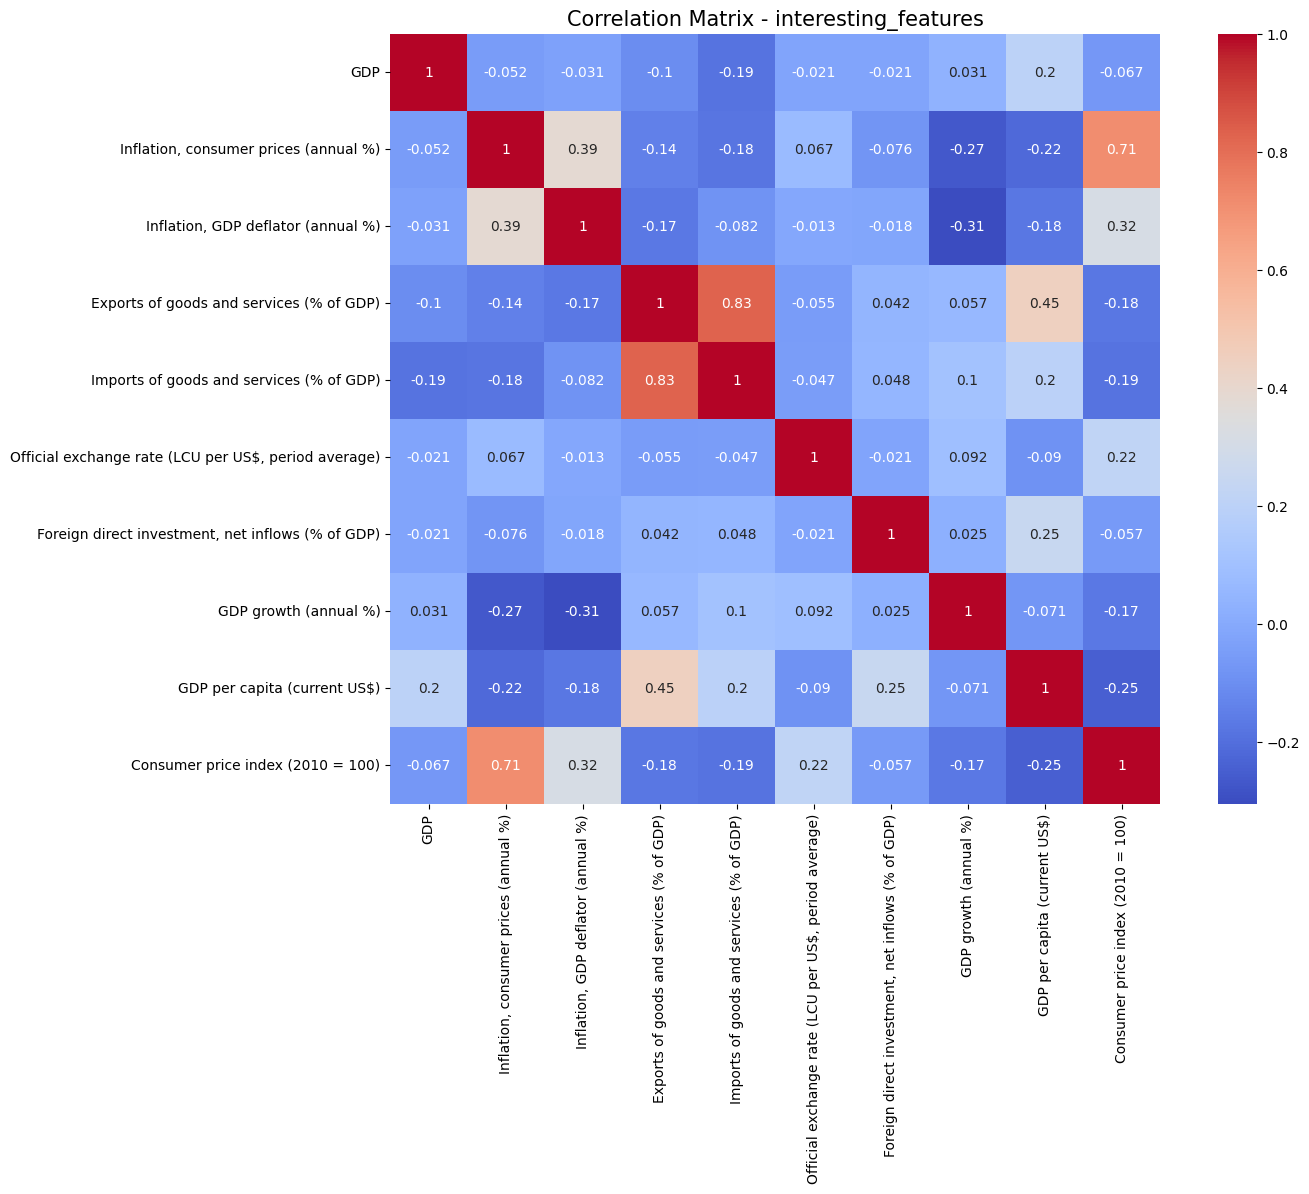

In [1421]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(corr_matrix1, vmax=1, square=True, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix - interesting_features", fontsize=15)

#### **Kết luận**: Các cột không có sự tương quan bất thường 

### **f. Biểu diễn sự phân bố của các biến thuộc tính**

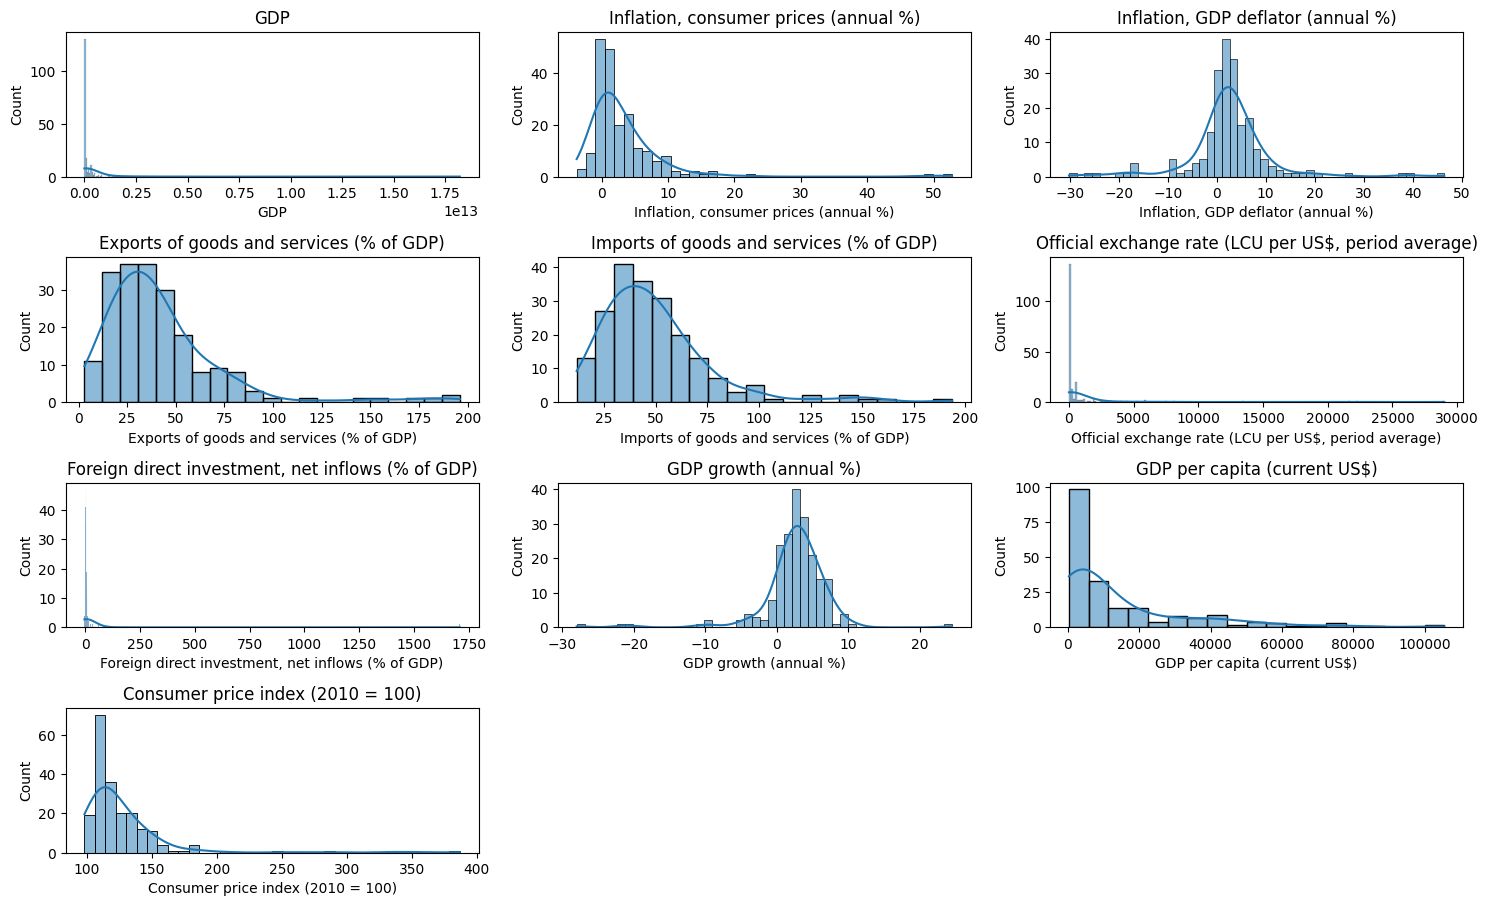

In [1422]:
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numeric_columns1, start=1):
    plt.subplot(9, 3, i)
    sns.histplot(df1[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

### **e. Chuẩn hoá dữ liệu**

In [1423]:
Scaler = StandardScaler()
Axes1 = Scaler.fit_transform(numeric_columns1)
Axes1 = pd.DataFrame(Axes1, columns=interesting_features1)
Axes1.shape

(204, 10)

## **4. Sử dụng K-Means để phân cụm dữ liệu**

### **a. Chọn tham số đưa vào mô hình**

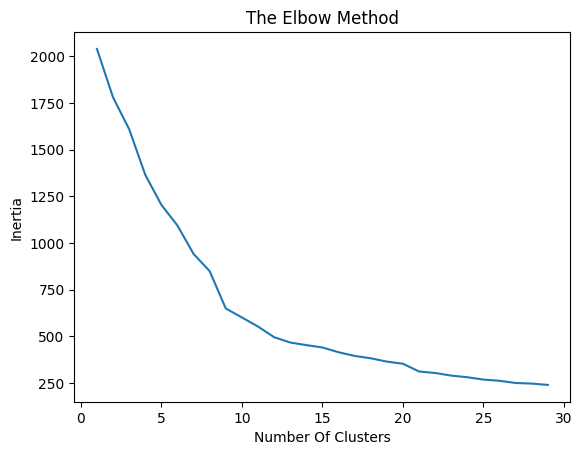

In [1424]:
InertiaList = []
NumberOfClustersRange = range(1, 30)

for i in range(1, 30):
    clusteringModel = KMeans(n_clusters=i, random_state=29)
    clusteringModel.fit(Axes1)
    InertiaList.append(clusteringModel.inertia_)

pyplot.plot(range(1, 30), InertiaList)
pyplot.xlabel("Number Of Clusters")
pyplot.ylabel("Inertia")
pyplot.title("The Elbow Method")
pyplot.show()

#### **Kết luận**: Chọn số lượng cụm là 8

### **b. Đưa dữ liêu vào thuật toán để phân cụm**

In [1425]:
model = KMeans(n_clusters=8, random_state=29)
y_clusters1 = model.fit_predict(Axes1)

## **5. Sử dụng Agglomerative để phân cụm dữ liệu**

### **a. Chọn tham số đưa vào mô hình**

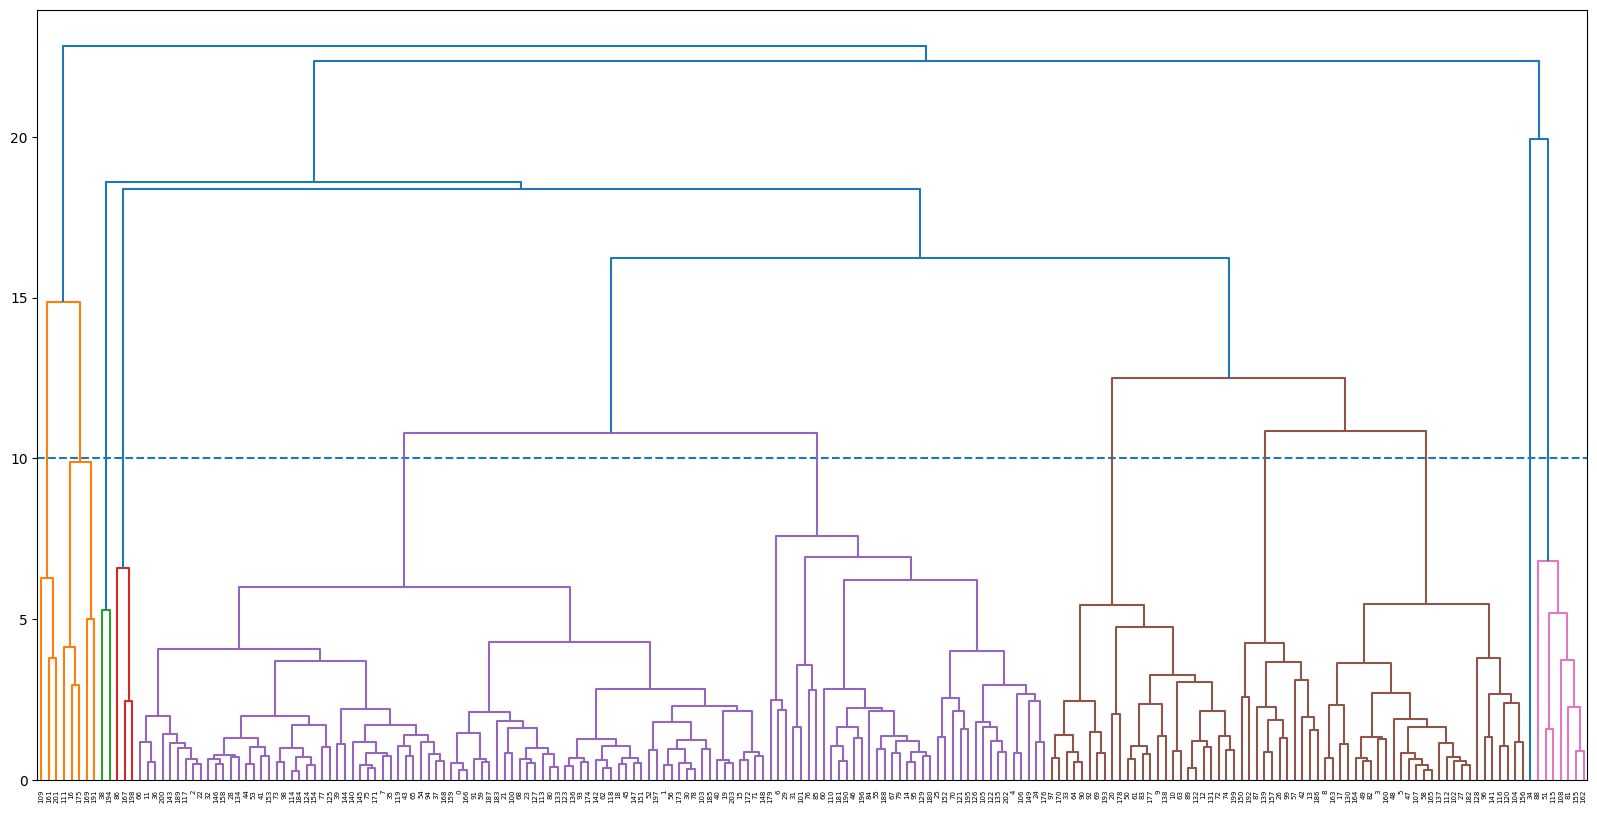

In [1426]:
plt.figure(figsize=(20, 10))
linkage_matrix = shc.linkage(Axes1, method='ward')
plt.axhline(10, linestyle='--')
dend = shc.dendrogram(linkage_matrix)

#### **Kết luận**: Chọn số lượng cụm là 11

### **b. Đưa dữ liêu vào thuật toán để phân cụm**

In [1427]:
cluster = AgglomerativeClustering(n_clusters=11, metric='euclidean', linkage='ward')
y_clusters2 = cluster.fit_predict(Axes1)

## **6. Sử dụng DBScan để phân cụm dữ liệu**

### **a. Chọn tham số đưa vào mô hình**

Text(0.5, 1.0, 'Sorting Maximum Distance in k Nearest Neighbor of kNN')

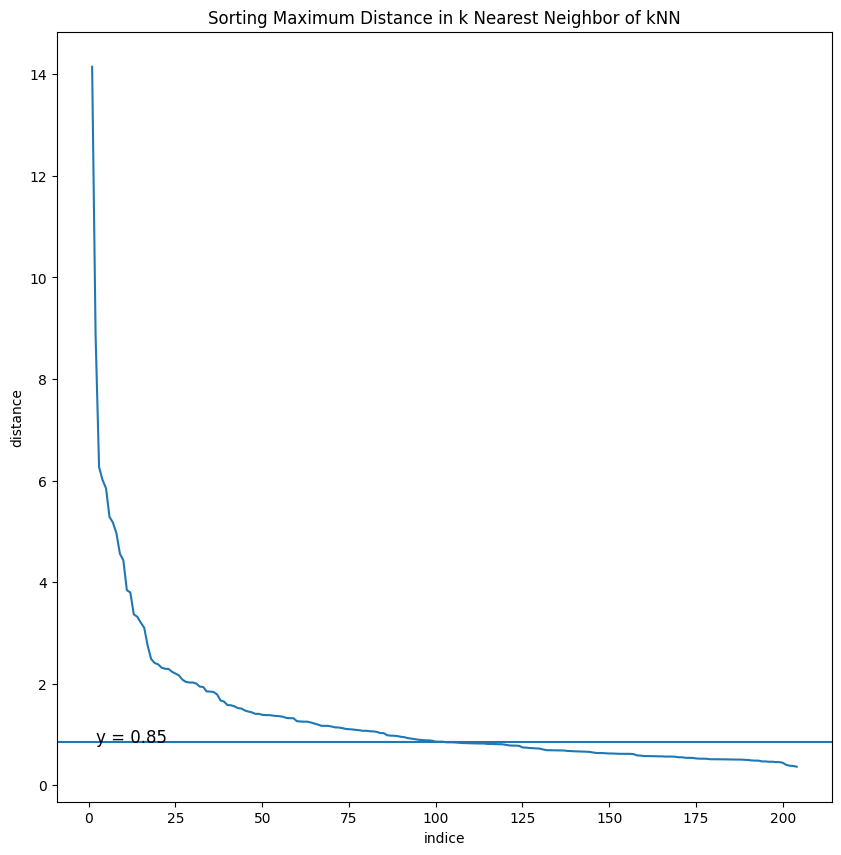

In [1428]:
neighbors = 3
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(Axes1)

distances, indices = nbrs.kneighbors(Axes1)

distance_desc = sorted(distances[:, neighbors-1], reverse=True)

plt.figure(figsize=(10, 10))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.axhline(y=0.85)
plt.text(2, 0.85, 'y = 0.85', fontsize=12)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')

### Chọn giá trị eps=0.85

In [1429]:
r = range(2,12)
sils = []
n_clusters = []
n_noise = []

for k in r:
    dbs = DBSCAN(eps=0.85, min_samples=k)
    dbs.fit(Axes1)
    dbs_labels = dbs.labels_
    sil_score = silhouette_score(Axes1, dbs.labels_)


    n_clusters_ = len(set(dbs_labels)) - (1 if -1 in dbs_labels else 0)
    n_noise_ = list(dbs_labels).count(-1)

    sils.append(sil_score)
    n_clusters.append(n_clusters_)
    n_noise.append(n_noise_)

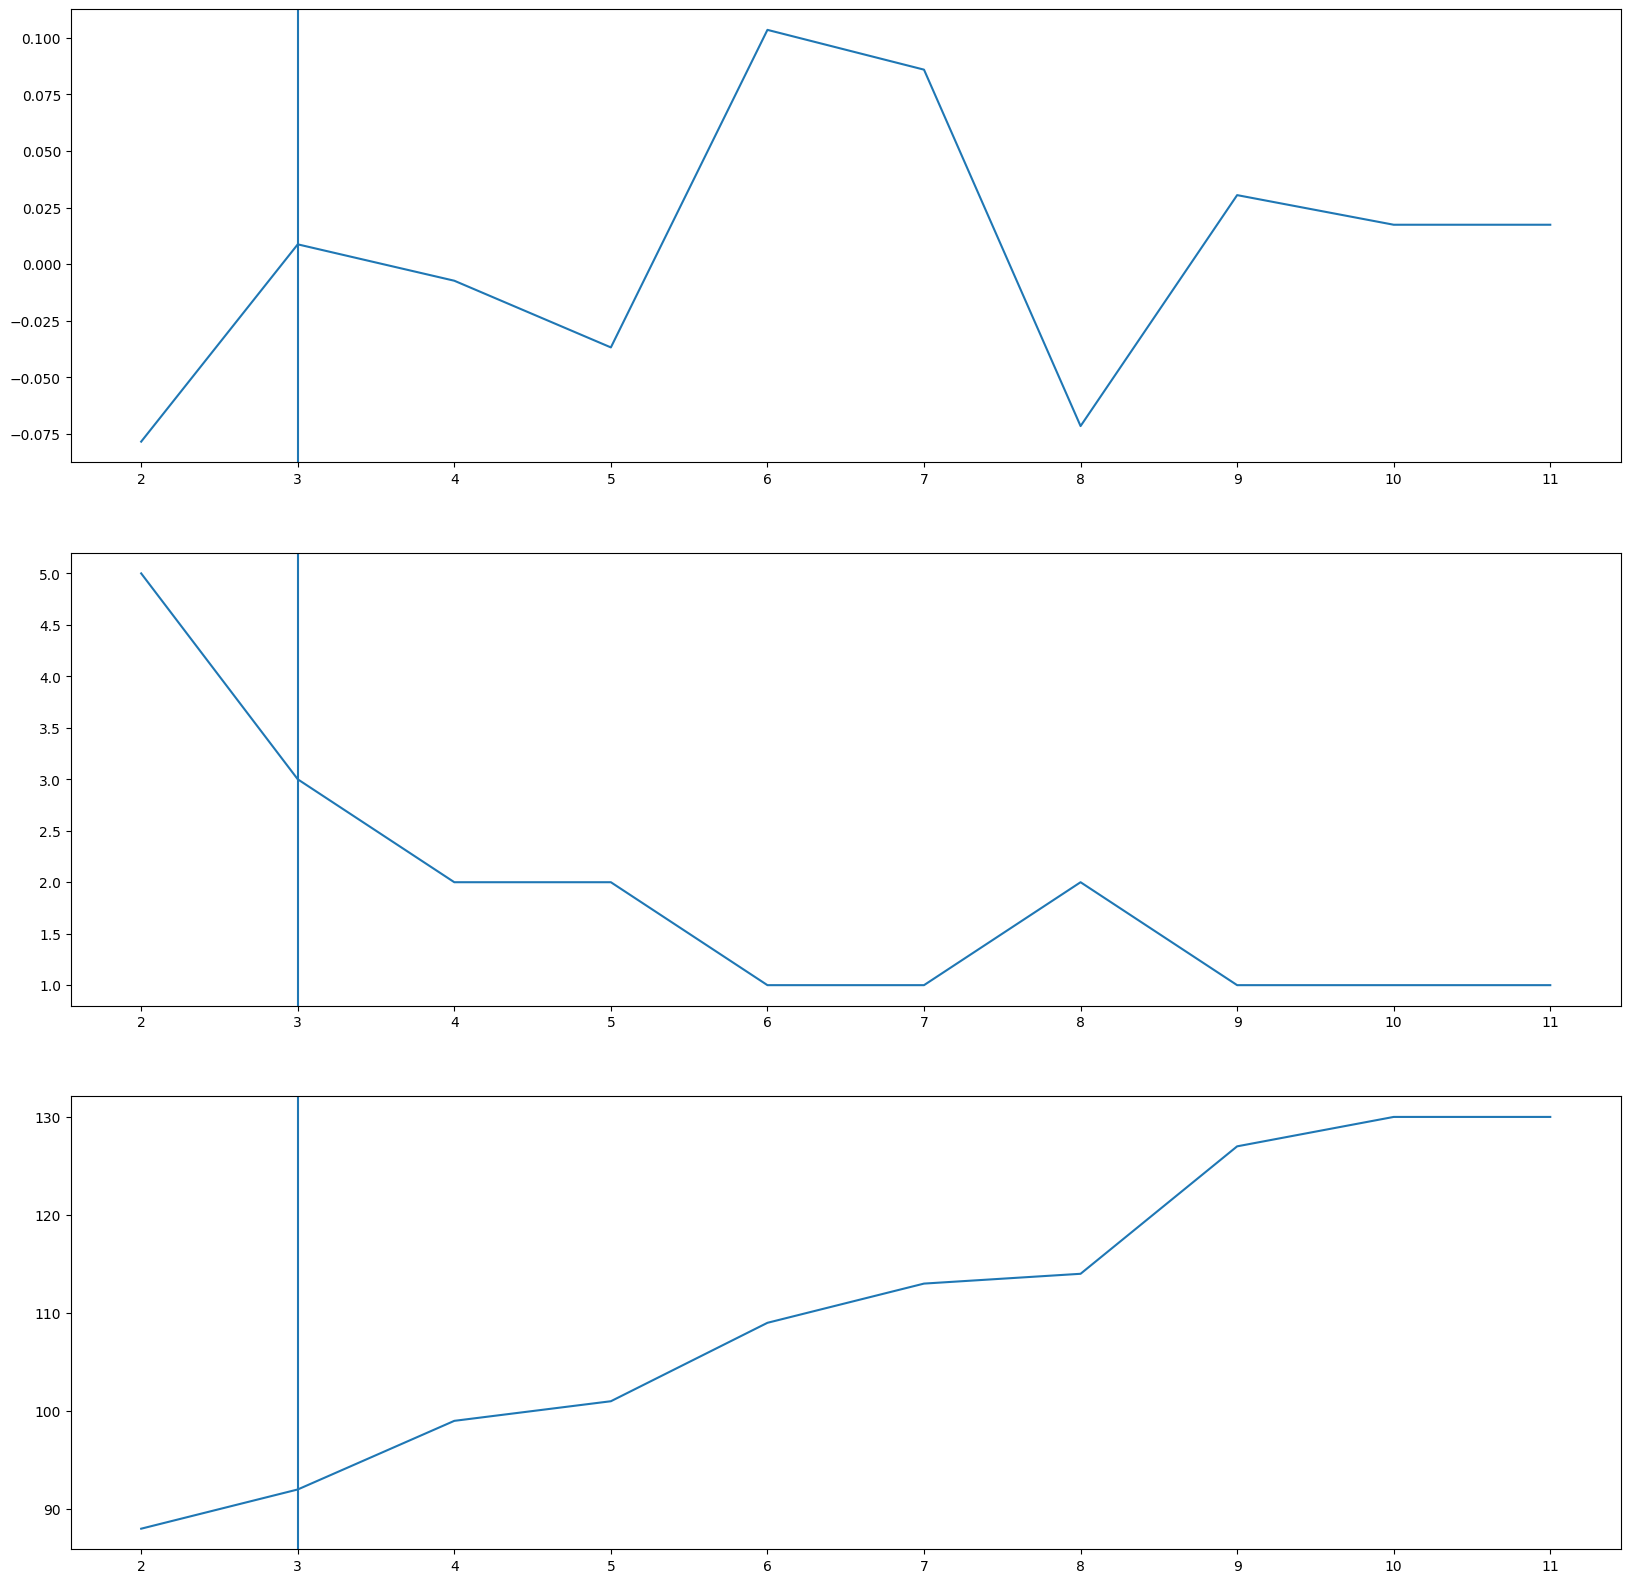

In [1430]:
x_choose = 3
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (20,20))


ax1 = plt.subplot(3,1,1)
ax1.plot(r, sils)
ax1.set_xticks(r)

ax2 = plt.subplot(3,1,2)
ax2.plot(r, n_clusters)
ax2.set_xticks(r)

ax3 = plt.subplot(3,1,3)
ax3.plot(r, n_noise)
ax3.set_xticks(r)

ax1.axvline(x=x_choose)
ax2.axvline(x=x_choose)
ax3.axvline(x=x_choose)

plt.show()

### Chọn giá trị số điểm nhỏ nhất trong cụm là 3

### **b. Đưa dữ liêu vào thuật toán để phân cụm**

In [1431]:
dbs = DBSCAN(eps=0.85, min_samples=3)
dbs.fit(Axes1)
dbs_labels = dbs.labels_

y_clusters3 = dbs.fit_predict(Axes1)

n_clusters_ = len(set(dbs_labels)) - (1 if -1 in dbs_labels else 0)
n_noise_ = list(dbs_labels).count(-1)

print("Số lượng cụm: %d" % n_clusters_)
print("Số lượng ngoại biên: %d" % n_noise_)

Số lượng cụm: 3
Số lượng ngoại biên: 92


## **7. Sử dụng Optics để phân cụm dữ liệu**

In [1432]:
clust = OPTICS(min_samples=2, xi=0.0005, min_cluster_size=0.03)
clust.fit(Axes1)

space = np.arange(len(Axes1))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]
y_clusters4 = clust.fit_predict(Axes1)

Text(0.5, 1.0, 'Reachability Plot')

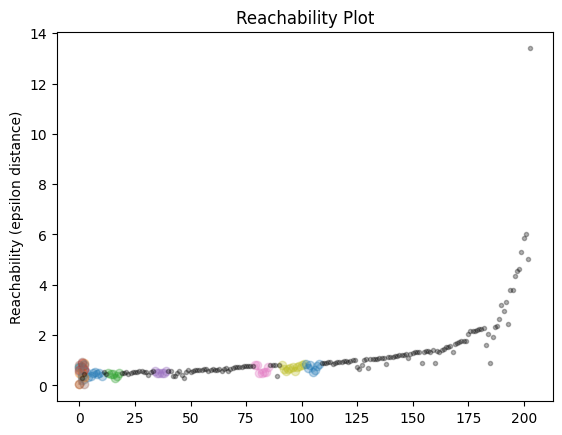

In [1433]:
colors = np.random.rand(9, 3)
for i in range(0,9):
    Xk = space[labels == i]
    Rk = reachability[labels == i]
    plt.plot(Xk, Rk, colors[i],alpha=0.3, marker='o')
plt.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
plt.ylabel("Reachability (epsilon distance)")
plt.title("Reachability Plot")

### Số lượng cụm là 8

## **8. Biểu diễn các cụm**

### **a. Thu giảm chiều dữ liệu bằng PCA**

In [1434]:
pca = PCA(n_components=3)
pca_components = pca.fit_transform(Axes1)
pca_df = pd.DataFrame(data=pca_components, columns=["PCA1", "PCA2", "PCA3"])
pca_df["Cluster1"] = y_clusters1
pca_df["Cluster2"] = y_clusters2
pca_df["Cluster3"] = y_clusters3
pca_df["Cluster4"] = y_clusters4

In [1435]:
pca_df

,PCA1,PCA2,PCA3,Cluster1,Cluster2,Cluster3,Cluster4
0,0.013331,-0.102403,-0.350017,1,4,0,-1
1,0.096798,-0.616922,-0.229451,1,4,0,-1
2,0.326928,-0.879069,-0.460975,1,4,0,3
3,-1.546379,0.855031,-0.563429,1,6,-1,-1
4,1.241338,0.006043,-0.156349,0,1,-1,-1
...,...,...,...,...,...,...,...
199,0.076466,0.394512,0.767112,6,8,-1,-1
200,-0.083122,-0.882419,-0.781117,1,4,-1,-1
201,3.867516,2.077908,3.971103,7,3,-1,-1
202,1.210664,0.443401,-0.215148,0,1,-1,-1


### **b. Biểu diễn các điểm trong cụm bằng không gian 3 chiều**

## K-means

In [1436]:
fig = px.scatter_3d(
    pca_df,
    x="PCA1",
    y="PCA2",
    z="PCA3",
    color="Cluster1",
    title="3D PCA Cluster Visualization",
)

fig.show()

##  Agglomerative

In [1437]:
fig = px.scatter_3d(
    pca_df,
    x="PCA1",
    y="PCA2",
    z="PCA3",
    color="Cluster2",
    title="3D PCA Cluster Visualization",
)

fig.show()

##  DBScan

In [1438]:
fig = px.scatter_3d(
    pca_df,
    x="PCA1",
    y="PCA2",
    z="PCA3",
    color="Cluster3",
    title="3D PCA Cluster Visualization",
)

fig.show()

##  Optics

In [1439]:
fig = px.scatter_3d(
    pca_df,
    x="PCA1",
    y="PCA2",
    z="PCA3",
    color="Cluster4",
    title="3D PCA Cluster Visualization",
)

fig.show()

### **c. Biểu diễn các điểm trong cụm bằng bản đồ thế giới**

##  K-means

In [1440]:
ClusterAssignments = pd.DataFrame(
    {"Country": df1["Country Name"], "Cluster1": y_clusters1, 
            "Cluster2": y_clusters2, "Cluster3": y_clusters3, "Cluster4": y_clusters4}
)
fig = px.choropleth(
    ClusterAssignments,
    locations="Country",
    locationmode="country names",
    color="Cluster1",
    hover_name="Country",
    title="Clusters",
    color_continuous_scale="YlGnBu",
    width=1000,
    height=600,
)
fig.show()

##  Agglomerative

In [1441]:
fig = px.choropleth(
    ClusterAssignments,
    locations="Country",
    locationmode="country names",
    color="Cluster2",
    hover_name="Country",
    title="Clusters",
    color_continuous_scale="YlGnBu",
    width=1000,
    height=600,
)
fig.show()

##  DBScan

In [1442]:
fig = px.choropleth(
    ClusterAssignments,
    locations="Country",
    locationmode="country names",
    color="Cluster3",
    hover_name="Country",
    title="Clusters",
    color_continuous_scale="YlGnBu",
    width=1000,
    height=600,
)
fig.show()

##  Optics

In [1443]:
fig = px.choropleth(
    ClusterAssignments,
    locations="Country",
    locationmode="country names",
    color="Cluster4",
    hover_name="Country",
    title="Clusters",
    color_continuous_scale="YlGnBu",
    width=1000,
    height=600,
)
fig.show()

## **9. Biểu diễn sự phân bố các giá trị thuộc tính giữa các cụm**

### Chọn mô hình phân cụm K-means để phân tích

In [1444]:
Axes1["cluster"] = y_clusters1

### a. Sự phân bố giá trị **tổng sản phẩm quốc nội (GDP)** của các cụm

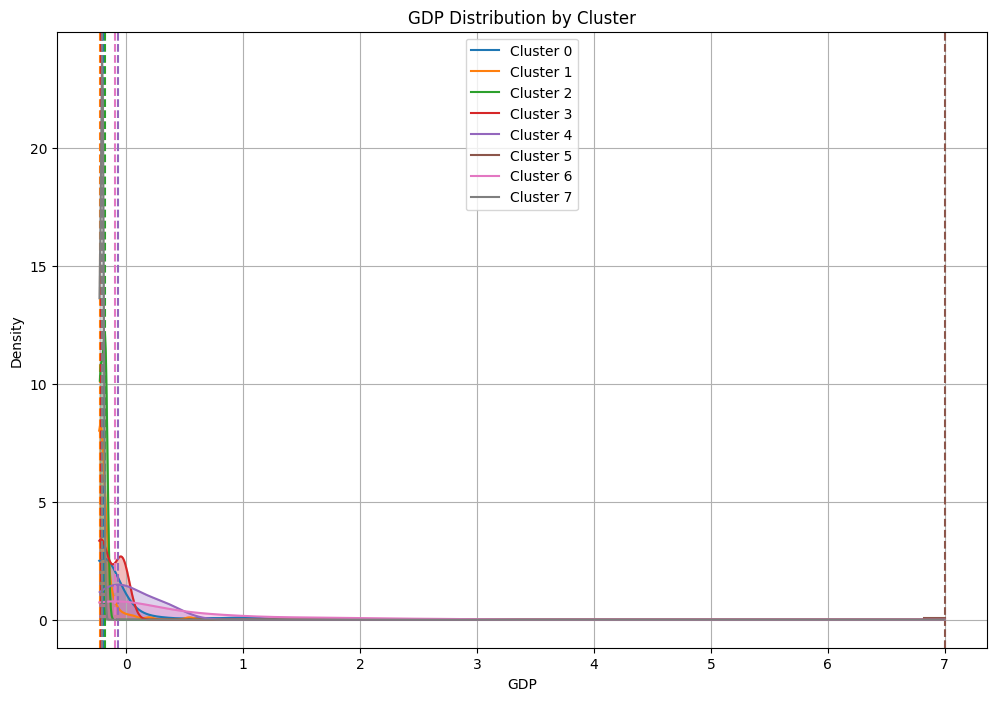

In [1445]:
xx1 = "GDP"
plt.figure(figsize=(12, 8))

colors = sns.color_palette(n_colors=8)

for cluster_num in range(8):
    cluster_data = Axes1[Axes1["cluster"] == cluster_num][xx1].dropna()

    kde = gaussian_kde(cluster_data)
    x_vals = np.linspace(cluster_data.min(), 7, 1000)
    kde_vals = kde(x_vals)
    plt.plot(
        x_vals, kde_vals, label=f"Cluster {cluster_num}", color=colors[cluster_num]
    )
    plt.fill_between(x_vals, kde_vals, alpha=0.3, color=colors[cluster_num])
    max_density_x = x_vals[np.argmax(kde_vals)]
    plt.axvline(x=max_density_x, color=colors[cluster_num], linestyle="--")

plt.title(f"{xx1} Distribution by Cluster")
plt.xlabel(xx1)
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

### b. Sự phân bố giá trị **tăng trưởng GDP hàng năm (%)** của các cụm

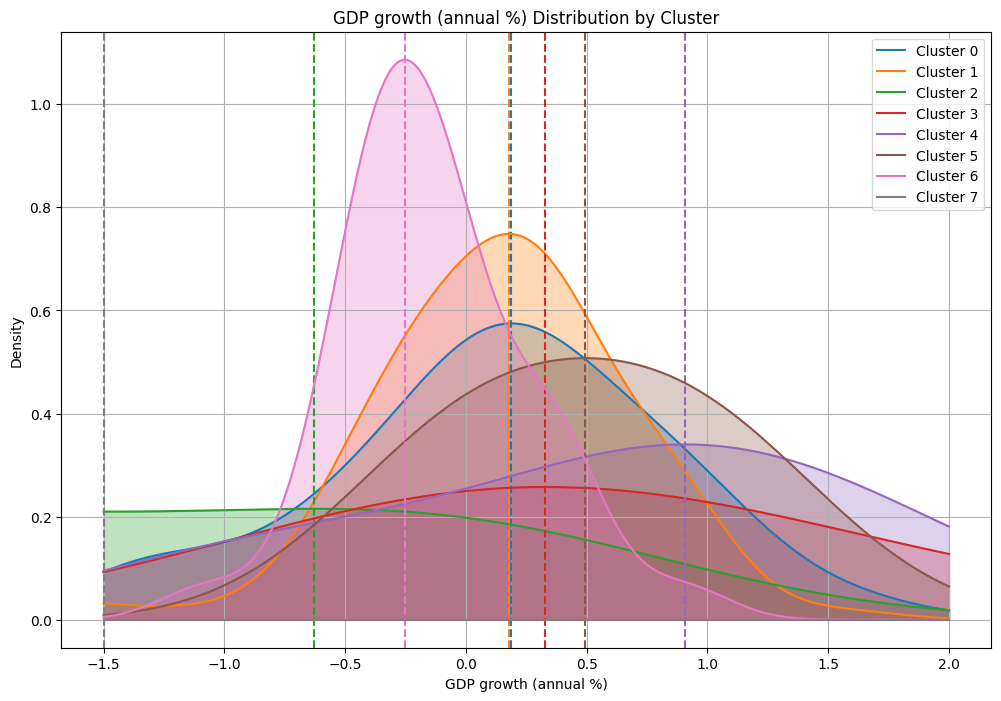

In [1446]:
xx1 = "GDP growth (annual %)"
plt.figure(figsize=(12, 8))

colors = sns.color_palette(n_colors=8)

for cluster_num in range(8):
    cluster_data = Axes1[Axes1["cluster"] == cluster_num][xx1].dropna()

    kde = gaussian_kde(cluster_data)
    x_vals = np.linspace(-1.5, 2, 1000)
    kde_vals = kde(x_vals)
    plt.plot(
        x_vals, kde_vals, label=f"Cluster {cluster_num}", color=colors[cluster_num]
    )
    plt.fill_between(x_vals, kde_vals, alpha=0.3, color=colors[cluster_num])
    max_density_x = x_vals[np.argmax(kde_vals)]
    plt.axvline(x=max_density_x, color=colors[cluster_num], linestyle="--")

plt.title(f"{xx1} Distribution by Cluster")
plt.xlabel(xx1)
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

### c. Sự phân bố giá trị **lạm phát, giá tiêu dùng hàng năm (%)** của các cụm

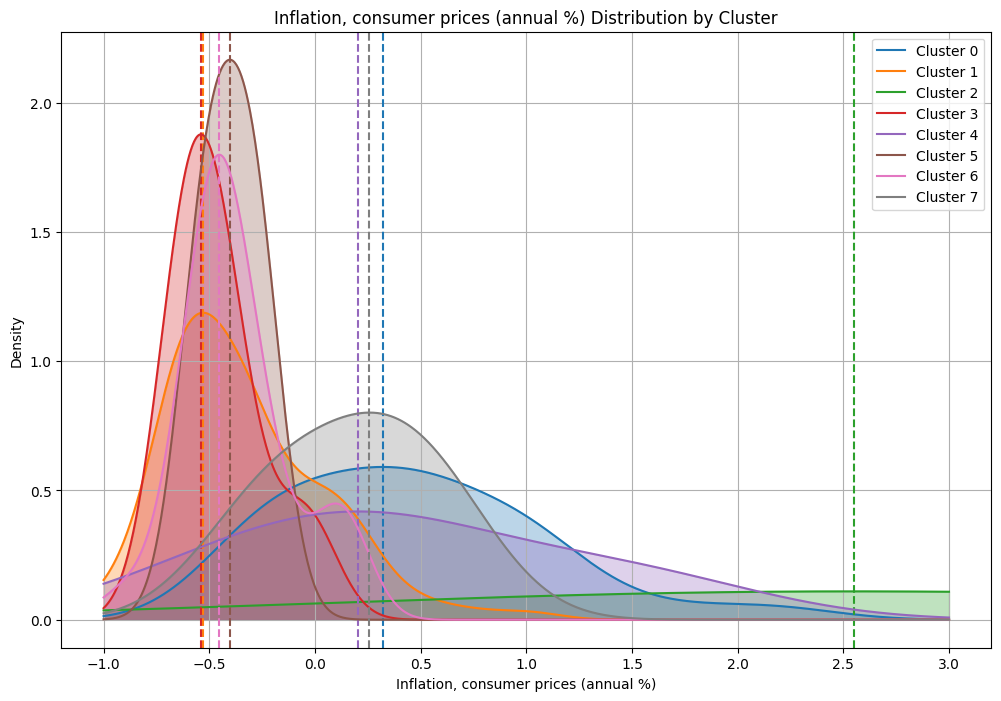

In [1447]:
xx1 = "Inflation, consumer prices (annual %)"
plt.figure(figsize=(12, 8))

colors = sns.color_palette(n_colors=8)

for cluster_num in range(8):
    cluster_data = Axes1[Axes1["cluster"] == cluster_num][xx1].dropna()

    kde = gaussian_kde(cluster_data)
    x_vals = np.linspace(-1, 3, 1000)
    kde_vals = kde(x_vals)
    plt.plot(
        x_vals, kde_vals, label=f"Cluster {cluster_num}", color=colors[cluster_num]
    )
    plt.fill_between(x_vals, kde_vals, alpha=0.3, color=colors[cluster_num])
    max_density_x = x_vals[np.argmax(kde_vals)]
    plt.axvline(x=max_density_x, color=colors[cluster_num], linestyle="--")

plt.title(f"{xx1} Distribution by Cluster")
plt.xlabel(xx1)
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

### d. Sự phân bố giá trị **lạm phát, chỉ số điều chỉnh GDP (annual %)** của các cụm

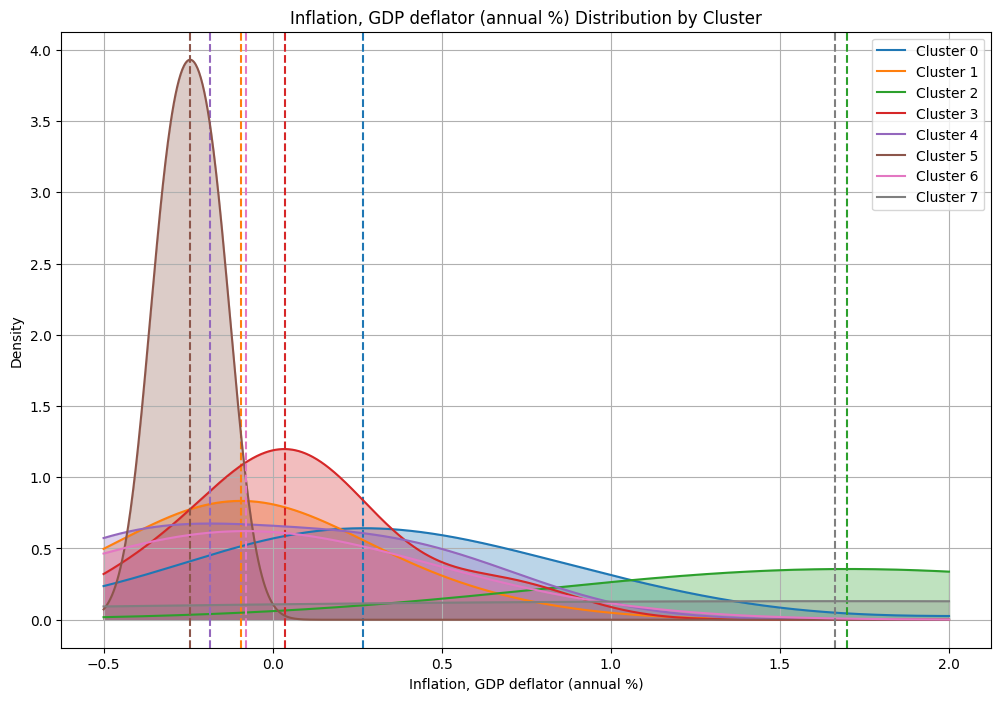

In [1448]:
xx1 = "Inflation, GDP deflator (annual %)"
plt.figure(figsize=(12, 8))

colors = sns.color_palette(n_colors=8)

for cluster_num in range(8):
    cluster_data = Axes1[Axes1["cluster"] == cluster_num][xx1].dropna()

    kde = gaussian_kde(cluster_data)
    x_vals = np.linspace(-0.5, 2, 1000)
    kde_vals = kde(x_vals)
    plt.plot(
        x_vals, kde_vals, label=f"Cluster {cluster_num}", color=colors[cluster_num]
    )
    plt.fill_between(x_vals, kde_vals, alpha=0.3, color=colors[cluster_num])
    max_density_x = x_vals[np.argmax(kde_vals)]
    plt.axvline(x=max_density_x, color=colors[cluster_num], linestyle="--")

plt.title(f"{xx1} Distribution by Cluster")
plt.xlabel(xx1)
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

### e. Sự phân bố giá trị **Xuất khẩu hàng hóa và dịch vụ (% của GDP)** của các cụm

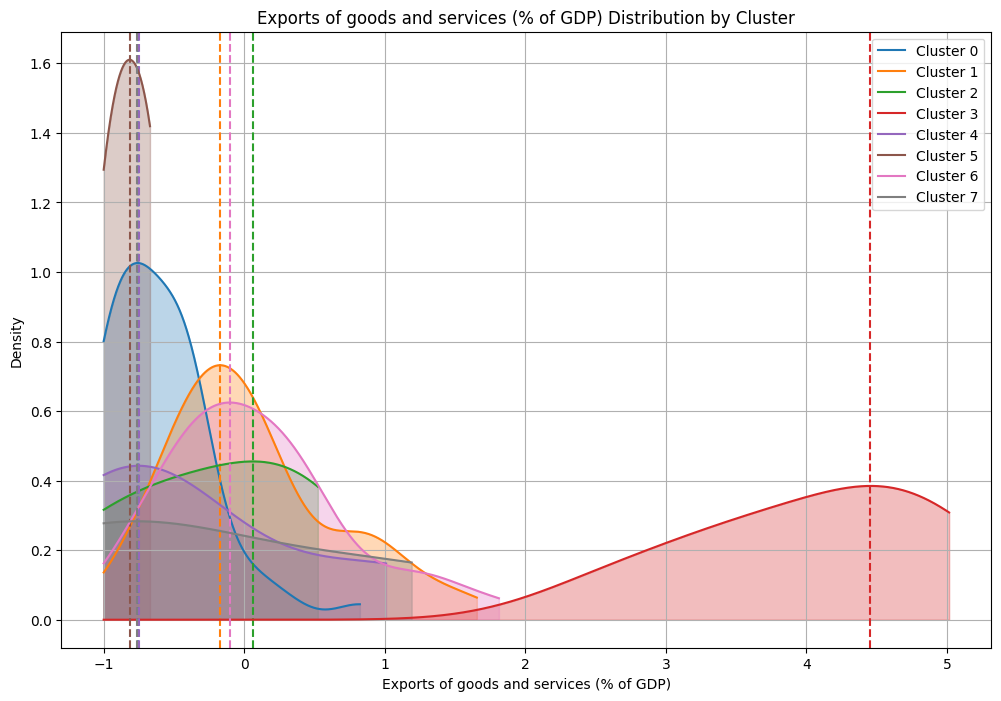

In [1449]:
xx1 = "Exports of goods and services (% of GDP)"
plt.figure(figsize=(12, 8))

colors = sns.color_palette(n_colors=8)

for cluster_num in range(8):
    cluster_data = Axes1[Axes1["cluster"] == cluster_num][xx1].dropna()

    kde = gaussian_kde(cluster_data)
    x_vals = np.linspace(-1, cluster_data.max(), 1000)
    kde_vals = kde(x_vals)
    plt.plot(
        x_vals, kde_vals, label=f"Cluster {cluster_num}", color=colors[cluster_num]
    )
    plt.fill_between(x_vals, kde_vals, alpha=0.3, color=colors[cluster_num])
    max_density_x = x_vals[np.argmax(kde_vals)]
    plt.axvline(x=max_density_x, color=colors[cluster_num], linestyle="--")

plt.title(f"{xx1} Distribution by Cluster")
plt.xlabel(xx1)
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

### e. Sự phân bố giá trị **Nhập khẩu hàng hóa và dịch vụ (% của GDP)** của các cụm

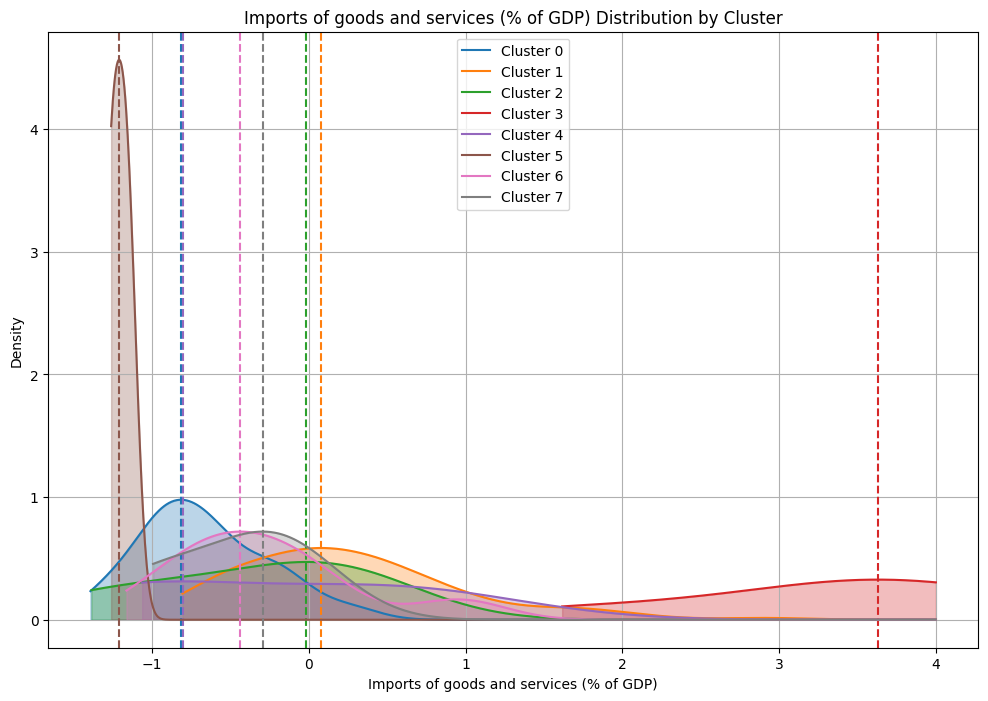

In [1450]:
xx1 = "Imports of goods and services (% of GDP)"
plt.figure(figsize=(12, 8))

colors = sns.color_palette(n_colors=8)

for cluster_num in range(8):
    cluster_data = Axes1[Axes1["cluster"] == cluster_num][xx1].dropna()

    kde = gaussian_kde(cluster_data)
    x_vals = np.linspace(cluster_data.min(), 4, 1000)
    kde_vals = kde(x_vals)
    plt.plot(
        x_vals, kde_vals, label=f"Cluster {cluster_num}", color=colors[cluster_num]
    )
    plt.fill_between(x_vals, kde_vals, alpha=0.3, color=colors[cluster_num])
    max_density_x = x_vals[np.argmax(kde_vals)]
    plt.axvline(x=max_density_x, color=colors[cluster_num], linestyle="--")

plt.title(f"{xx1} Distribution by Cluster")
plt.xlabel(xx1)
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

### f. Sự phân bố giá trị **Tỷ giá hối đoái chính thức (đơn vị tiền tệ nội địa trên mỗi USD, trung bình kỳ)** của các cụm

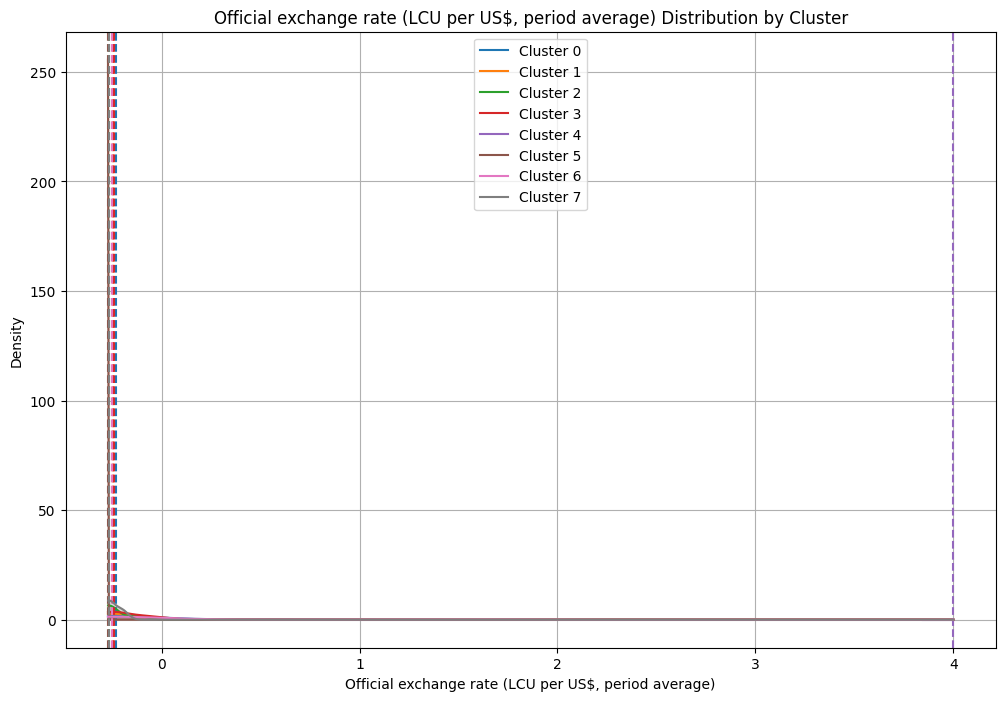

In [1451]:
xx1 = "Official exchange rate (LCU per US$, period average)"
plt.figure(figsize=(12, 8))

colors = sns.color_palette(n_colors=8)

for cluster_num in range(8):
    cluster_data = Axes1[Axes1["cluster"] == cluster_num][xx1].dropna()

    kde = gaussian_kde(cluster_data)
    x_vals = np.linspace(cluster_data.min(), 4, 1000)
    kde_vals = kde(x_vals)
    plt.plot(
        x_vals, kde_vals, label=f"Cluster {cluster_num}", color=colors[cluster_num]
    )
    plt.fill_between(x_vals, kde_vals, alpha=0.3, color=colors[cluster_num])
    max_density_x = x_vals[np.argmax(kde_vals)]
    plt.axvline(x=max_density_x, color=colors[cluster_num], linestyle="--")

plt.title(f"{xx1} Distribution by Cluster")
plt.xlabel(xx1)
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

### g. Sự phân bố giá trị **Đầu tư trực tiếp nước ngoài (FDI), dòng vốn ròng (% của GDP)** của các cụm

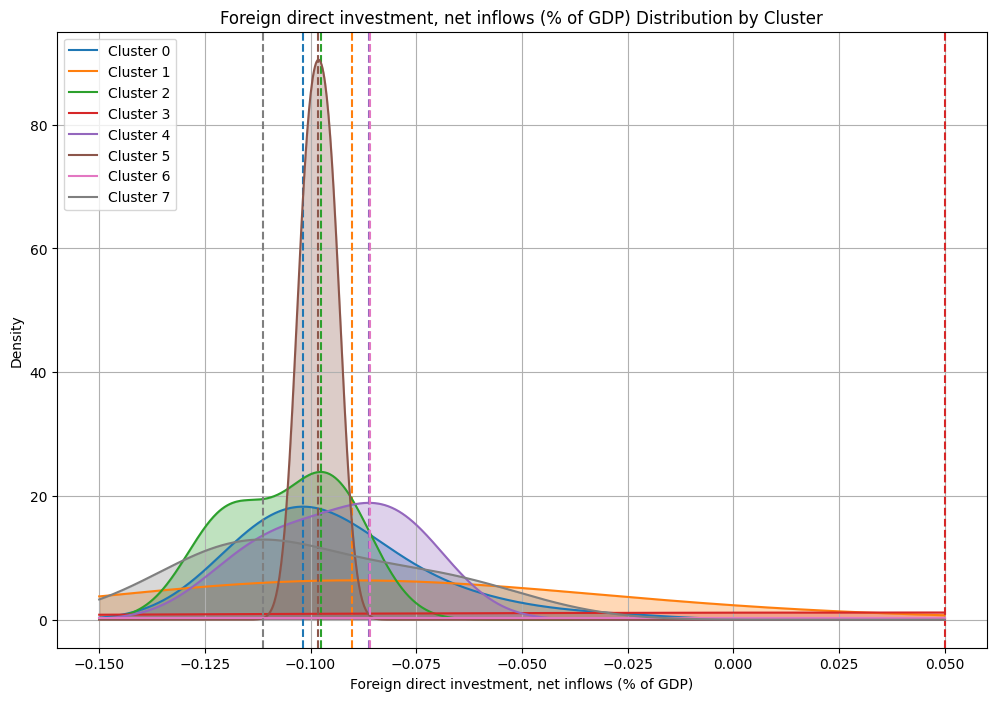

In [1452]:
xx1 = "Foreign direct investment, net inflows (% of GDP)"
plt.figure(figsize=(12, 8))

colors = sns.color_palette(n_colors=8)

for cluster_num in range(8):
    cluster_data = Axes1[Axes1["cluster"] == cluster_num][xx1].dropna()

    kde = gaussian_kde(cluster_data)
    x_vals = np.linspace(-0.15, 0.05, 1000)
    kde_vals = kde(x_vals)
    plt.plot(
        x_vals, kde_vals, label=f"Cluster {cluster_num}", color=colors[cluster_num]
    )
    plt.fill_between(x_vals, kde_vals, alpha=0.3, color=colors[cluster_num])
    max_density_x = x_vals[np.argmax(kde_vals)]
    plt.axvline(x=max_density_x, color=colors[cluster_num], linestyle="--")

plt.title(f"{xx1} Distribution by Cluster")
plt.xlabel(xx1)
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

### g. Sự phân bố giá trị **GDP bình quân đầu người (US$ hiện tại)** của các cụm

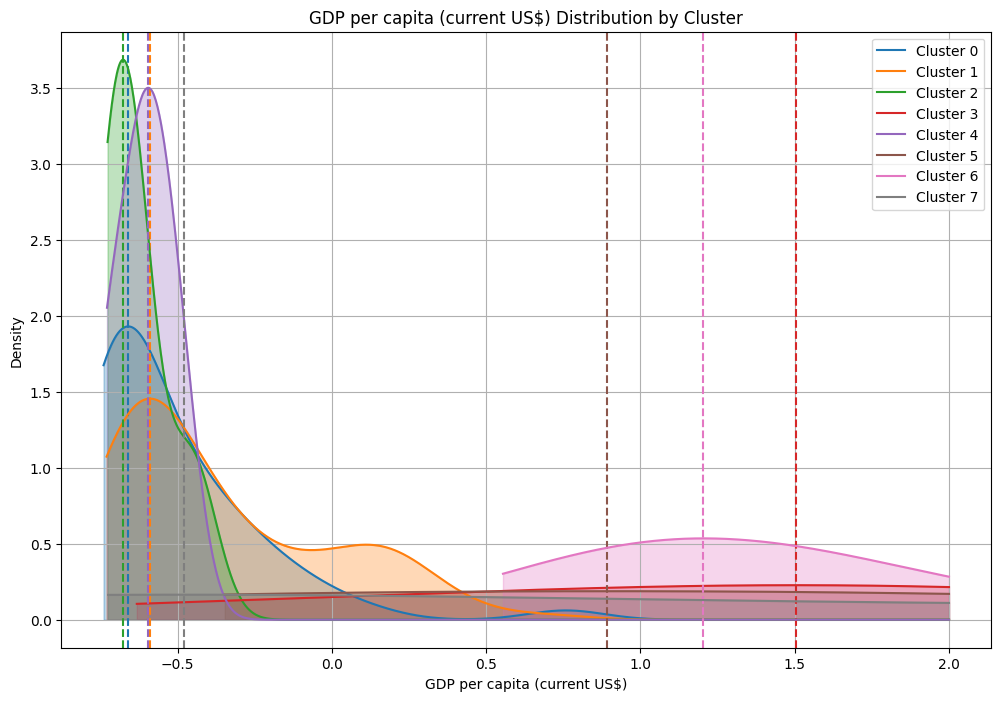

In [1453]:
xx1 = "GDP per capita (current US$)"
plt.figure(figsize=(12, 8))

colors = sns.color_palette(n_colors=8)

for cluster_num in range(8):
    cluster_data = Axes1[Axes1["cluster"] == cluster_num][xx1].dropna()

    kde = gaussian_kde(cluster_data)
    x_vals = np.linspace(cluster_data.min(), 2, 1000)
    kde_vals = kde(x_vals)
    plt.plot(
        x_vals, kde_vals, label=f"Cluster {cluster_num}", color=colors[cluster_num]
    )
    plt.fill_between(x_vals, kde_vals, alpha=0.3, color=colors[cluster_num])
    max_density_x = x_vals[np.argmax(kde_vals)]
    plt.axvline(x=max_density_x, color=colors[cluster_num], linestyle="--")

plt.title(f"{xx1} Distribution by Cluster")
plt.xlabel(xx1)
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

### g. Sự phân bố giá trị **Chỉ số giá tiêu dùng (2010 = 100)** của các cụm

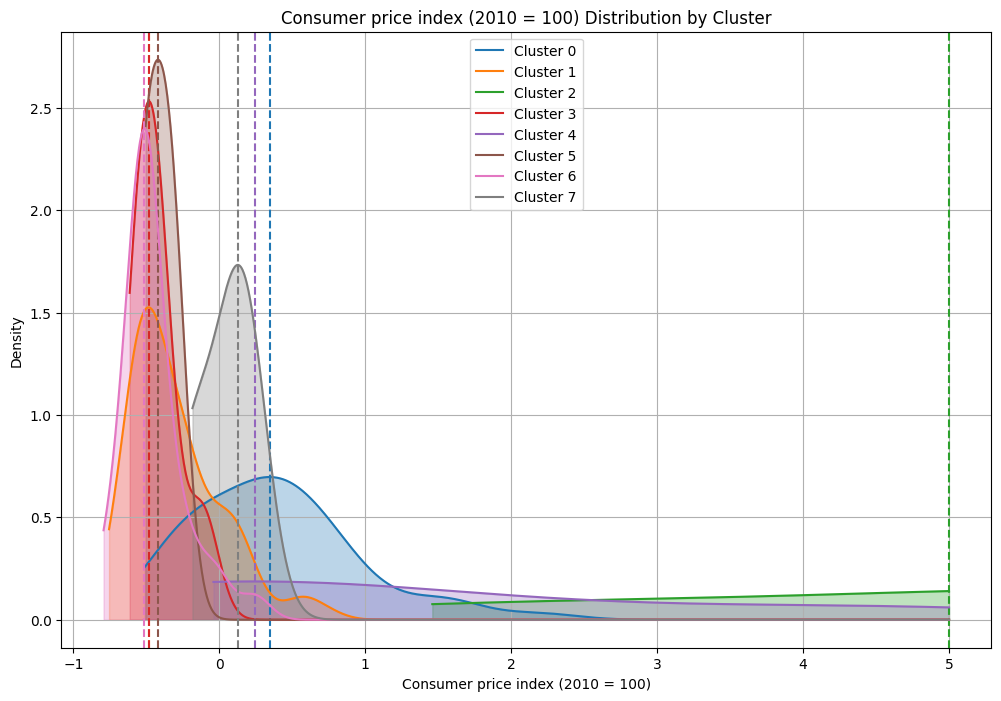

In [1454]:
xx1 = "Consumer price index (2010 = 100)"
plt.figure(figsize=(12, 8))

colors = sns.color_palette(n_colors=8)

for cluster_num in range(8):
    cluster_data = Axes1[Axes1["cluster"] == cluster_num][xx1].dropna()

    kde = gaussian_kde(cluster_data)
    x_vals = np.linspace(cluster_data.min(), 5, 1000)
    kde_vals = kde(x_vals)
    plt.plot(
        x_vals, kde_vals, label=f"Cluster {cluster_num}", color=colors[cluster_num]
    )
    plt.fill_between(x_vals, kde_vals, alpha=0.3, color=colors[cluster_num])
    max_density_x = x_vals[np.argmax(kde_vals)]
    plt.axvline(x=max_density_x, color=colors[cluster_num], linestyle="--")

plt.title(f"{xx1} Distribution by Cluster")
plt.xlabel(xx1)
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

## **10. Kết luận đưa ra nhận xét từ các cụm**

### **Cụm 0**

**Tổng quan:** Các quốc gia trong cụm này có nền kinh tế ở mức thấp.

- Tăng trưởng GDP ở mức trung bình.
- Lạm phát (giá tiêu dùng và GDP deflator) ở mức trung bình.
- Cả xuất khẩu và nhập khẩu đều ở mức thấp, cho thấy nền kinh tế ít giao thương quốc tế.
- Tỷ giá hối đoái chính thức thấp, thể hiện tiền tệ có giá trị thấp so với đồng USD.
- Đầu tư trực tiếp nước ngoài (FDI) ở mức thấp, cho thấy sự hấp dẫn đầu tư nước ngoài hạn chế.
- Chỉ số giá tiêu dùng ở mức trung bình.

**Bao gồm một số quốc gia:** Angola, Uzbekistan,...

----------------------
### **Cụm 1**

**Tổng quan:** Các quốc gia này cũng có nền kinh tế ở mức thấp nhưng có một số khác biệt so với cụm 0.

- Tăng trưởng GDP ở mức trung bình.
- Lạm phát (giá tiêu dùng và GDP deflator) thấp.
- Xuất khẩu hàng hóa và dịch vụ thấp, nhập khẩu trung bình cao, cho thấy sự phụ thuộc vào hàng hóa nước ngoài.
- Tỷ giá hối đoái chính thức và FDI thấp, hạn chế thu hút đầu tư và có giá trị tiền tệ thấp.
- Chỉ số giá tiêu dùng thấp, cho thấy giá cả hàng hoá thấp.

**Bao gồm một số quốc gia:** Afghanistan, Algeria,...

----------------------
### **Cụm 2**

**Tổng quan:** Các quốc gia này có nền kinh tế kém phát triển.

- Tăng trưởng GDP thấp.
- Lạm phát (giá tiêu dùng) rất cao và GDP deflator cao.
- Xuất khẩu ở mức trung bình, nhập khẩu cao, cho thấy sự tiêu thụ hàng hóa nước ngoài lớn.
- Tỷ giá hối đoái chính thức thấp, tiền tệ có giá trị thấp.
- FDI cao, cho thấy sự thu hút đầu tư nước ngoài.
- Chỉ số giá tiêu dùng rất cao, cho thấy giá cả hàng hoá thấp.

**Bao gồm một số quốc gia:** Ukraine, Belarus,...

----------------------
### **Cụm 3**

**Tổng quan:** Các quốc gia này có nền kinh tế thấp nhưng có xuất nhập khẩu rất cao.

- Tăng trưởng GDP trung bình.
- Lạm phát (giá tiêu dùng) thấp và GDP deflator trung bình thấp, cho thấy giá cả ổn định.
- Xuất khẩu và nhập khẩu rất cao, cho thấy sự tham gia mạnh mẽ vào thị trường quốc tế.
- Tỷ giá hối đoái chính thức thấp, tiền tệ có giá trị thấp.
- FDI trung bình.
- Chỉ số giá tiêu dùng thấp, cho thấy giá cả hàng hoá đắt đỏ.

**Bao gồm một số quốc gia:** San Marino, Luxembourg,...

----------------------
### **Cụm 4**

**Tổng quan:** Các quốc gia này có nền kinh tế ở mức trung bình.

- Tăng trưởng GDP cao.
- Lạm phát (giá tiêu dùng) trung bình và GDP deflator thấp.
- Xuất khẩu thấp, nhập khẩu trung bình thấp, cho thấy tiêu thụ hàng hóa nước ngoài vừa phải.
- Tỷ giá hối đoái chính thức rất cao, tiền tệ có giá trị cao.
- FDI thấp, ít thu hút đầu tư nước ngoài.
- Chỉ số giá tiêu dùng thấp, cho thấy giá cả hàng hoá đắt đỏ.

**Bao gồm một số quốc gia:** Indonesia, Viet Nam,...

----------------------
### **Cụm 5**

**Tổng quan:** Các quốc gia này có nền kinh tế siêu cường.

- Tăng trưởng GDP trung bình cao.
- Lạm phát (giá tiêu dùng và GDP deflator) thấp.
- Xuất khẩu thấp, nhập khẩu rất cao, tiêu thụ hàng hóa nước ngoài mạnh mẽ.
- Tỷ giá hối đoái chính thức cao, tiền tệ có giá trị cao.
- FDI thấp.
- Chỉ số giá tiêu dùng ở mức trung bình.

**Bao gồm một số quốc gia:** China, United States,...

----------------------
### **Cụm 6**

**Tổng quan:** Các quốc gia này có nền kinh tế phát triển.

- Tăng trưởng GDP trung bình thấp.
- Lạm phát (giá tiêu dùng) thấp và GDP deflator trung bình.
- Xuất khẩu trung bình, nhập khẩu trung bình.
- Tỷ giá hối đoái chính thức thấp, tiền tệ có giá trị thấp.
- FDI cao, thu hút được đầu tư nước ngoài.
- Chỉ số giá tiêu dùng ở mức trung bình.

**Bao gồm một số quốc gia:** Australia, France, Germany, Japan,...

----------------------
### **Cụm 7**

**Tổng quan:** Các quốc gia này có nền kinh tế thấp với các chỉ số lạm phát rất thấp. Phần lớn là các vùng lãnh thổ nhỏ hoặc khu tự trị.

- Tăng trưởng GDP trung bình thấp.
- Lạm phát (giá tiêu dùng và GDP deflator) rất thấp, giá cả rất ổn định.
- Xuất khẩu thấp, nhập khẩu thấp, ít giao thương quốc tế.
- Tỷ giá hối đoái chính thức thấp, tiền tệ có giá trị thấp.
- FDI thấp, ít thu hút đầu tư nước ngoài.
- Chỉ số giá tiêu dùng trung bình, giá cả hàng hóa và dịch vụ ổn định.

**Bao gồm một số quốc gia:** Sierra Leone, Yemen, Rep,...

----------------------